In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r'D:\DA_Portfolio\Global Condom Sales and Awareness (2015-2025)\Dataset\Rich_Global_Condom_Usage_Dataset.csv')
df['Year'] = pd.to_datetime(df['Year'], errors='coerce', format='%Y')  
df['Year'] = df['Year'].dt.year


df[['Male Purchases (%)', 'Female Purchases (%)']] = df['Male vs Female Purchases (%)'].str.extract(r'(\d+)% Male - (\d+)% Female')
df = df.drop(columns='Male vs Female Purchases (%)')

df.rename(columns={'Teen Pregnancy Rate (per 1000 teens)': 'Teen Pregnancy Rate (per 10000 teens)'}, inplace=True)

df['Male Purchases (%)'] = pd.to_numeric(df['Male Purchases (%)'], errors='coerce')
df['Female Purchases (%)'] = pd.to_numeric(df['Female Purchases (%)'], errors='coerce')

custom_palette = ['#E63946','#A8DADC', '#457B9D', '#1D3557','#F1FAEE']
custom_palette2 = ['#E63946','#A8DADC', '#457B9D']

In [3]:
df

,Year,Country,Total Sales (Million Units),Market Revenue (Million USD),Government Campaigns,Awareness Index (0-10),Most Popular Condom Type,Contraceptive Usage Rate (%),Teen Pregnancy Rate (per 10000 teens),HIV Prevention Awareness (%),Online Sales (%),Average Price per Condom (USD),Brand Dominance,Sex Education Programs (Yes/No),Male Purchases (%),Female Purchases (%)
0,2015,USA,378,276.304977,No,2.93,Latex,27.10,58.37,89.17,45.00,1.34,Kamasutra,No,69,39
1,2015,USA,1875,3002.379846,No,9.28,Ultra-Thin,63.97,50.63,69.25,57.10,2.43,Skyn,No,50,33
2,2015,USA,2496,6564.222333,Yes,5.26,Non-Latex,56.21,42.23,56.13,59.52,2.30,Skyn,Yes,46,54
3,2015,USA,1437,4993.892125,Yes,3.63,Non-Latex,89.71,55.86,78.36,56.83,2.48,Manforce,No,49,57
4,2015,USA,1923,5355.152313,Yes,5.71,Non-Latex,86.96,7.82,37.61,47.99,0.34,Trojan,Yes,40,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,2025,Australia,585,876.695845,No,5.53,Textured,77.79,52.35,89.26,20.34,0.48,LifeStyles,Yes,52,60
546,2025,Australia,273,311.965966,Yes,3.43,Textured,48.71,32.15,85.71,15.77,1.96,LifeStyles,No,62,41
547,2025,Australia,994,2787.762423,Yes,5.52,Textured,57.73,63.18,33.34,18.98,1.10,Durex,Yes,45,59
548,2025,Australia,730,938.731002,Yes,6.73,Ultra-Thin,30.33,32.88,61.39,16.43,0.87,Skyn,Yes,72,31


In [4]:
df.columns

Index(['Year', 'Country', 'Total Sales (Million Units)',
       'Market Revenue (Million USD)', 'Government Campaigns',
       'Awareness Index (0-10)', 'Most Popular Condom Type',
       'Contraceptive Usage Rate (%)', 'Teen Pregnancy Rate (per 10000 teens)',
       'HIV Prevention Awareness (%)', 'Online Sales (%)',
       'Average Price per Condom (USD)', 'Brand Dominance',
       'Sex Education Programs (Yes/No)', 'Male Purchases (%)',
       'Female Purchases (%)'],
      dtype='object')

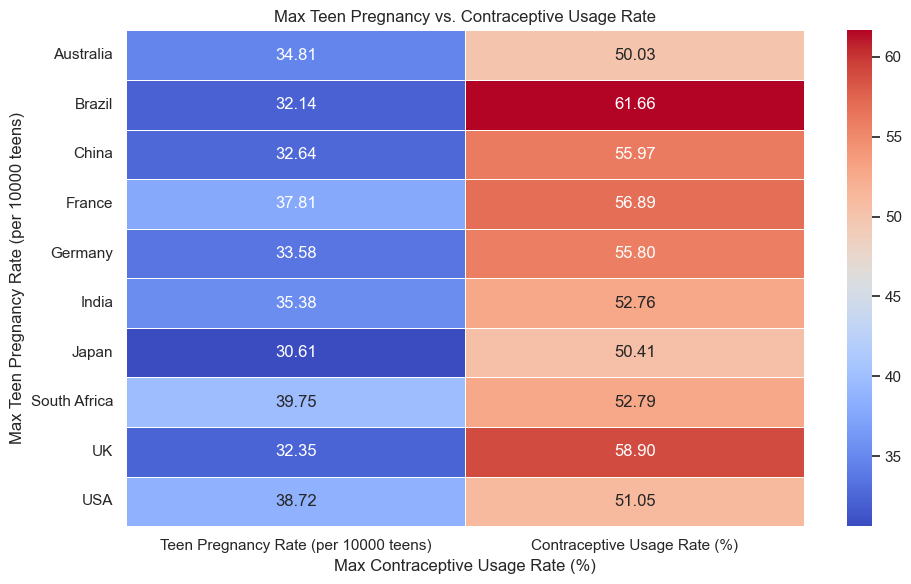

In [30]:
plt.figure(figsize=(10, 6))
sns.set_theme(style='darkgrid')
df_CUR = df.groupby('Country')[['Teen Pregnancy Rate (per 10000 teens)','Contraceptive Usage Rate (%)']].mean()
sns.heatmap(df_CUR, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f",)
plt.xlabel("Max Contraceptive Usage Rate (%)")
plt.ylabel("Max Teen Pregnancy Rate (per 10000 teens)")
plt.title("Max Teen Pregnancy vs. Contraceptive Usage Rate")
plt.tight_layout()
plt.show()

Insights & Analysis: Teen Pregnancy vs. Contraceptive Usage
Your heatmap visualizes the maximum values of Teen Pregnancy Rates (per 10,000 teens) and Contraceptive Usage Rates (%) across different countries. Here’s what we can analyze from the data:

🔹 Key Observations
🔄 Inverse Relationship (Generally, But Not Always)

Countries with higher contraceptive usage rates tend to have lower teen pregnancy rates (e.g., Japan, Brazil, UK).

Countries with lower contraceptive usage rates tend to have higher teen pregnancy rates (South Africa, USA).

However, this trend is not absolute, meaning other factors may also play a role.

🇧🇷 Brazil Has the Highest Contraceptive Usage (61.66%) But Still Not the Lowest Teen Pregnancy Rate (32.14)

This suggests that contraceptive access alone is not enough to fully prevent teen pregnancies.

Possible reasons:

Inconsistent usage (e.g., lack of education on proper use).

Cultural and social factors (e.g., early marriages, lack of awareness).

Access to other reproductive health services (like abortion or emergency contraception).

🇿🇦 South Africa Has the Highest Teen Pregnancy Rate (39.75 per 10,000 teens)

Despite having a 52.79% contraceptive usage rate, the teen pregnancy rate is still high.

Possible explanations:

Limited access to contraception in rural areas.

High rates of sexual violence or unplanned pregnancies.

Lack of proper sex education leading to ineffective use of contraception.

🇯🇵 Japan Has the Lowest Teen Pregnancy Rate (30.61 per 10,000 teens) Despite a Moderate Contraceptive Usage Rate (50.41%)

This suggests that factors beyond contraception contribute to lower teen pregnancies in Japan.

Possible reasons:

Strong sex education programs.

Delaying of marriage and childbearing.

Cultural norms discouraging teen pregnancies.

🇺🇸 USA Has a Relatively High Teen Pregnancy Rate (38.72 per 10,000 teens) Despite a 51.05% Contraceptive Usage Rate

The USA has better access to contraception than many countries, yet its teen pregnancy rate remains high.

Potential reasons:

Variability in sex education across states (some states focus on abstinence-only education).

High rates of unintended pregnancies despite contraceptive availability.

Healthcare inequalities affecting access to reproductive health services.

📌 Insights on the Relationship Between Teen Pregnancy & Contraceptive Use
✅ Contraceptive usage is an important factor, but not the only one.
✅ Countries with strong sex education programs tend to have lower teen pregnancy rates, even with moderate contraceptive usage.
✅ Social, cultural, and economic factors play a big role in teen pregnancy rates.